In [30]:
import pandas as pd
from pandas_datareader import data
import itertools
import numpy as np
import matplotlib.pyplot as plt 

from google.colab import files
uploaded = files.upload()

Saving Stock Price Data.csv to Stock Price Data (1).csv


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


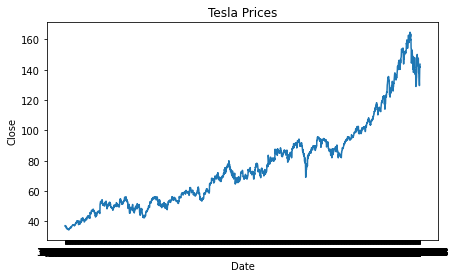

In [31]:
df = pd.read_csv("Stock Price Data.csv")
plt.figure(figsize=(7,4))
plt.title('Tesla Prices')
plt.xlabel('Date')
plt.ylabel('Close')
plt.plot(df["Date"], df["Close"])

In [32]:
df["Date"] = pd.to_datetime(df["Date"], infer_datetime_format=True)
df.set_index(df["Date"], inplace=True)

df = df.drop(['Open', 'High', 'Low','Volume', 'Adj Close'], axis=1)

In [33]:
df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

In [34]:
df.head()

,ds,y
Date,,
2009-12-31,2009-12-31,36.998249
2010-01-04,2010-01-04,37.234500
2010-01-05,2010-01-05,37.162500
2010-01-06,2010-01-06,37.133251
2010-01-07,2010-01-07,37.059000


In [35]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) 
m.fit(df)

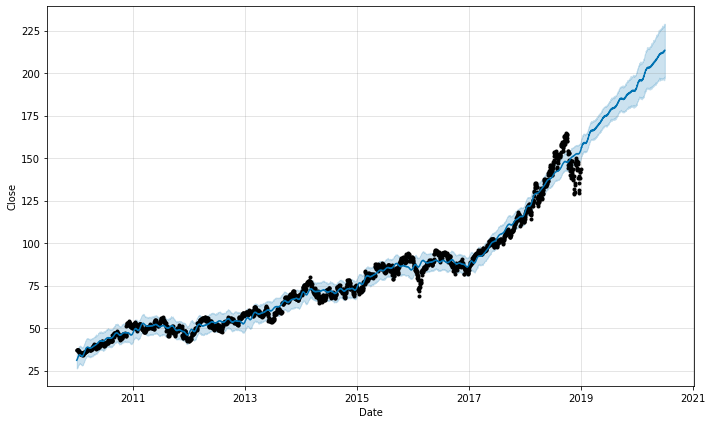

In [56]:
future = m.make_future_dataframe(periods=550)
prediction = m.predict(future)
m.plot(prediction)
plt.xlabel("Date")
plt.ylabel("Close")
plt.show()

In [110]:
predictions = prediction[['ds', 'yhat']]
predictions.head()

,ds,yhat
0,2009-12-31,31.041841
1,2010-01-04,31.707152
2,2010-01-05,31.988188
3,2010-01-06,32.273756
4,2010-01-07,32.638359


In [111]:
range = (predictions['ds'] > '2019-01-1') & (predictions['ds'] <= '2020-05-29')
predictions = predictions.loc[range]
predictions.reset_index(inplace=True)
predictions.rename(columns={'ds':'Date'}, inplace=True)
predictions.drop(["index"], axis=1, inplace=True)
# predictions['Date'] = (predictions['Date']).dt.strftime("%e/%m/%Y")
predictions

,Date,yhat
0,2019-01-02,154.780565
1,2019-01-03,155.192859
2,2019-01-04,155.410849
3,2019-01-05,156.084208
4,2019-01-06,156.375745
...,...,...
509,2020-05-25,210.142493
510,2020-05-26,210.320161
511,2020-05-27,210.496823
512,2020-05-28,210.749393


In [113]:
from google.colab import files
uploaded = files.upload()
df1 = pd.read_csv('Sample Submission.csv')


Saving Sample Submission.csv to Sample Submission (2).csv


In [115]:
df1["Date"] = pd.to_datetime(df1["Date"], dayfirst=True)

In [116]:
df2 = pd.merge(df1, predictions, on=['Date'], how='inner')
df2

,Date,Close,yhat
0,2019-01-02,100,154.780565
1,2019-01-03,100,155.192859
2,2019-01-04,100,155.410849
3,2019-01-07,100,156.127099
4,2019-01-08,100,156.455079
...,...,...,...
350,2020-05-22,100,209.870536
351,2020-05-26,100,210.320161
352,2020-05-27,100,210.496823
353,2020-05-28,100,210.749393


In [117]:
df2.drop(["Close"], axis=1, inplace=True)

In [119]:
df2.rename(columns={'yhat':'Close'}, inplace=True)

In [121]:
df2['Date'] = (df2['Date']).dt.strftime("%e/%m/%Y")

In [124]:
df2

,Date,Close
0,2/01/2019,154.780565
1,3/01/2019,155.192859
2,4/01/2019,155.410849
3,7/01/2019,156.127099
4,8/01/2019,156.455079
...,...,...
350,22/05/2020,209.870536
351,26/05/2020,210.320161
352,27/05/2020,210.496823
353,28/05/2020,210.749393


In [131]:
df3['Close'] = np.array(df2["Close"])
df3.to_csv('FBProphet.csv', index=False)